<a href="https://colab.research.google.com/github/marianogoes/PCD/blob/main/Algoritmo_Gen%C3%A9tico_Tesina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algoritmo genético

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score

classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [ ]:
import numpy as np
np.bool = np.bool_

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score


Ajustes a la base de datos

In [ ]:
data=pd.read_excel('/content/Database.xlsx')

In [ ]:
enc_estado = (data.groupby('Estado').size()) / len(data)
data['Estadp_fe'] = data['Estado'].apply(lambda x : enc_estado[x])

In [ ]:
base_D = pd.get_dummies(data, columns = ['Personas', 'Sexo','UltimoNivelEducativo','Salud','GradoPadre','GradoMadre','Piel'])

In [ ]:
pd.options.display.max_columns = None

In [ ]:
data_bc = base_D
label_bc = data_bc["RangoAlto"]
data_bc.drop(["Estado","RangoAlto","Ingresos"],axis = 1,inplace = True)

print("Nivel de ingresos dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Nivel de ingresos dataset:
 17640 Records
 65 Features


In [ ]:
data_bc

,CompartenGasto,ParentezcoJefe,estatura,Peso,Estadp_fe,Personas_1,Personas_2,Personas_3,Personas_4,Personas_5,Personas_6,Personas_7,Personas_8,Personas_9,Personas_10,Personas_11,Personas_12,Personas_13,Personas_14,Personas_15,Sexo_1,Sexo_2,UltimoNivelEducativo_0,UltimoNivelEducativo_1,UltimoNivelEducativo_2,UltimoNivelEducativo_3,UltimoNivelEducativo_4,UltimoNivelEducativo_5,UltimoNivelEducativo_6,UltimoNivelEducativo_7,UltimoNivelEducativo_8,UltimoNivelEducativo_9,UltimoNivelEducativo_10,UltimoNivelEducativo_11,UltimoNivelEducativo_12,Salud_1,Salud_2,Salud_3,Salud_4,Salud_5,GradoPadre_0,GradoPadre_1,GradoPadre_2,GradoPadre_3,GradoPadre_4,GradoPadre_5,GradoPadre_6,GradoMadre_0,GradoMadre_1,GradoMadre_2,GradoMadre_3,GradoMadre_4,GradoMadre_5,GradoMadre_6,Piel_1,Piel_2,Piel_3,Piel_4,Piel_5,Piel_6,Piel_7,Piel_8,Piel_9,Piel_10,Piel_11
0,1,1,48,47,0.033787,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,1,66,90,0.033787,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,1,66,58,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,1,50,85,0.033787,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1,1,56,74,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17635,1,2,52,97,0.026701,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
17636,1,2,56,65,0.026701,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
17637,1,2,47,48,0.026701,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,F

In [ ]:
display(data_bc.head())
print("The features in this dataset have both discrete and continuous values")

,CompartenGasto,ParentezcoJefe,estatura,Peso,Estadp_fe,Personas_1,Personas_2,Personas_3,Personas_4,Personas_5,Personas_6,Personas_7,Personas_8,Personas_9,Personas_10,Personas_11,Personas_12,Personas_13,Personas_14,Personas_15,Sexo_1,Sexo_2,UltimoNivelEducativo_0,UltimoNivelEducativo_1,UltimoNivelEducativo_2,UltimoNivelEducativo_3,UltimoNivelEducativo_4,UltimoNivelEducativo_5,UltimoNivelEducativo_6,UltimoNivelEducativo_7,UltimoNivelEducativo_8,UltimoNivelEducativo_9,UltimoNivelEducativo_10,UltimoNivelEducativo_11,UltimoNivelEducativo_12,Salud_1,Salud_2,Salud_3,Salud_4,Salud_5,GradoPadre_0,GradoPadre_1,GradoPadre_2,GradoPadre_3,GradoPadre_4,GradoPadre_5,GradoPadre_6,GradoMadre_0,GradoMadre_1,GradoMadre_2,GradoMadre_3,GradoMadre_4,GradoMadre_5,GradoMadre_6,Piel_1,Piel_2,Piel_3,Piel_4,Piel_5,Piel_6,Piel_7,Piel_8,Piel_9,Piel_10,Piel_11
0,1,1,48,47,0.033787,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,1,66,90,0.033787,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,1,66,58,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,1,1,50,85,0.033787,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,1,1,56,74,0.033787,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False


The features in this dataset have both discrete and continuous values


In [ ]:
score1 = acc_score(data_bc,label_bc)
score1

,Classifier,Accuracy
0,AdaBoost,0.842630
1,GradientBoosting,0.842404
2,RandomForest,0.840816
3,RadialSVM,0.839229
4,LinearSVM,0.838549
5,Logistic,0.837188
6,KNeighbors,0.819501
7,DecisionTree,0.753061


In [ ]:
logmodel = AdaBoostClassifier(n_estimators=50, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Best score in generation 1 : [0.8442176870748299]
Best score in generation 2 : [0.8435374149659864]
Best score in generation 3 : [0.8437641723356009]
Best score in generation 4 : [0.845124716553288]
Best score in generation 5 : [0.8442176870748299]


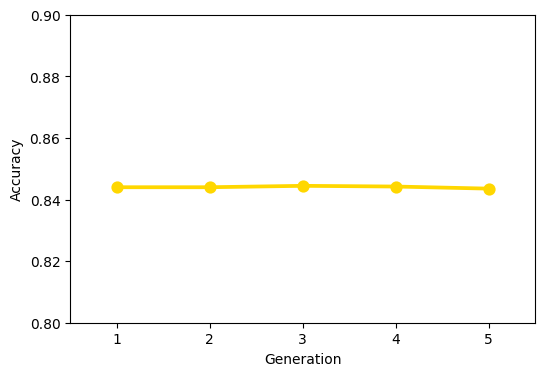

In [ ]:
plot(score_bc,0.8,0.9,c = "gold")

In [ ]:
n_feat=data_bc.shape[1]

In [ ]:
best_chromo=chromo_df_bc[4]

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings

print(f"Versión de scikit-learn: {sklearn.__version__}")

Versión de scikit-learn: 1.2.2


In [ ]:
# División de los datos en entrenamiento y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        data_bc.iloc[:,best_chromo],
                                        label_bc,
                                        random_state = 123
                                    )
# Creación del modelo
# ==============================================================================
modelo = HistGradientBoostingRegressor(
            max_iter     = 10,
            loss         = 'squared_error',
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=10, random_state=123)

In [ ]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.35478033585601754


In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'loss'             : ['squared_error', 'absolute_error'],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'max_depth'        : [3, 5, 10, 20],
              'l2_regularization': [0, 1, 10]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = HistGradientBoostingRegressor(
                        max_iter            = 1000,
                        random_state        = 123,
                        # Activación de la parada temprana
                        early_stopping      = True,
                        validation_fraction = 0.1,
                        n_iter_no_change    = 10,
                        tol                 = 1e-7,
                        scoring             = 'loss',
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_l2_regularization,param_learning_rate,param_loss,param_max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
64,10,0.1,squared_error,3,-0.344509,0.005089,-0.334468,0.003540
16,0,0.1,squared_error,3,-0.344654,0.005129,-0.335775,0.001853
40,1,0.1,squared_error,3,-0.344750,0.005196,-0.334745,0.003414
41,1,0.1,squared_error,5,-0.344770,0.005440,-0.326327,0.002053


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'l2_regularization': 10, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3} : -0.3445094089740193 neg_root_mean_squared_error


In [ ]:
# Número de árboles del modelo final (early stopping)
# ==============================================================================
print(f"Número de árboles del modelo: {grid.best_estimator_.n_iter_}")

Número de árboles del modelo: 143


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3493810871166726


In [ ]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
3,0.010786,0.000411,Estadp_fe
18,0.010493,0.000368,UltimoNivelEducativo_11
2,0.006532,0.000599,estatura
19,0.004208,0.000287,UltimoNivelEducativo_12
17,0.003281,0.000138,UltimoNivelEducativo_10
15,0.001917,0.000219,UltimoNivelEducativo_6
13,0.001683,0.000146,UltimoNivelEducativo_2
21,0.001657,0.000162,Salud_2
37,0.001490,0.000167,Piel_10
20,0.001453,0.000098,Salud_1


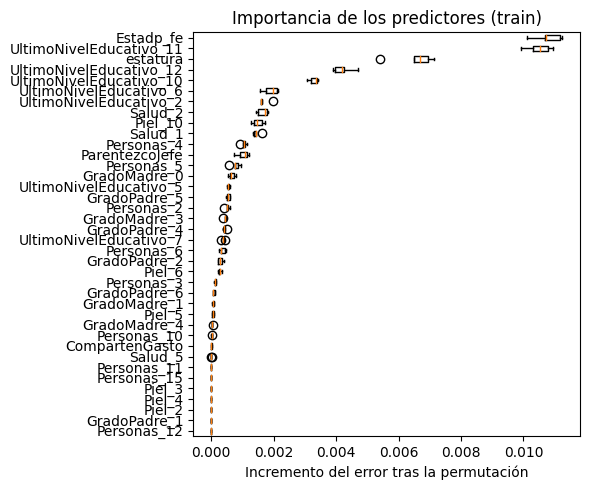

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
sorted_idx = importancia.importances_mean.argsort()
ax.boxplot(
        importancia.importances[sorted_idx].T,
        vert   = False,
        labels = data_bc.iloc[:,best_chromo].columns[sorted_idx]
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación')
fig.tight_layout();